# 更改颜色空间等操作
- 颜色空间转换
- - 在OpenCV中一般常用的颜色空间为BGR，可以将其转换为GRAY；其它颜色空间一般不做太多要求。
- 图像大小缩放
- 图像平移
- - 水平 or 垂直平移图像，对于没有原图像的位置直接填充黑色。
- 图像旋转
- 仿射变换
- - 仿射变换不会改变原始图像中点的特征信息，比如：点之间的共线性
- 透视变换
- - 透视变换就是利用透视中心、像点以及目标点三点共线的条件进行旋转，最终透视变换之后的结果会保证几何图形不变性。
- 二值化图像
- - 将灰度对象转换为黑白图像

![OpenCV图像几何变换](picture/OpenCV图像几何变换.png)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'SimSun']

## 色彩空间的改变 cv.cvtColor(input_image, flag)
- OpenCV中有150多种颜色空间转换方法。最广泛使用的转换方法有两种，BGR<->Gray和BGR<->HSV。
参数:
- input_image: 进行颜色空间转换的图像
- flag:转换类型
- - CV.COLOR_BGR2GRAY: BGR<->Gray
- - CV.COLOR_BGR2HSV: BGR<->HSV

In [2]:
# 加载图像
img = cv.imread("./images/small.png")

# 从 BGR 转到 色调-饱和度-明度
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
print("图像的形状（HSV格式）：", hsv.shape)

print("\n色调：所有行、所有列的 H 通道值：\n", hsv[:, :, 0], sep="")

图像的形状（HSV格式）： (5, 4, 3)

色调：所有行、所有列的 H 通道值：
[[  0 177  67 143]
 [  0 177  67 143]
 [  0   0  90   0]
 [120  40 133  40]
 [ 60  40 133  40]]


In [3]:
hsv[:, 0]  # 第 1 列的 HSV 值

# 第 1 列：色调
# array([[  0,   0,   0],
#        [  0, 255, 255],                # 0：红色            
#        [  0,   0, 255],
#        [120, 255, 255],                # 120：蓝色
#        [ 60, 255, 255]], dtype=uint8)  # 60：绿色

array([[  0,   0,   0],
       [  0, 255, 255],
       [  0,   0, 255],
       [120, 255, 255],
       [ 60, 255, 255]], dtype=uint8)

In [4]:
img[:, 0]  # 第 1 列 BGR 颜色信息

array([[  0,   0,   0],
       [  0,   0, 255],
       [255, 255, 255],
       [255,   0,   0],
       [  0, 255,   0]], dtype=uint8)

In [5]:
# 获取所有的颜色通道（以 COLOR_ 开头的属性）
# 在 OpenCV 中 HSV 颜色空间的取值范围为：H->[0, 179], S->[0, 255], V->[0, 255]; 其它图像处理软件不一样
# 画图工具：色调 [0, 359]，饱和度 [0, 100]，明度 [0, 100]
# dir(cv)：返回 cv 的所有属性和方法的名称列表
flags = [i for i in dir(cv) if i.startswith('COLOR_')]

print(f"总颜色转换方式：{len(flags)}")
print(flags)

总颜色转换方式：346
['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_V

In [6]:
# 转换颜色空间
# 加载图像
img = cv.imread('./images/xiaoren.png')

# 将图像转换为灰度图像
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 图像可视化
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
# 转换颜色空间
# 加载图像
img = cv.imread('./images/opencv-logo.png')

# 转换为 HSV 格式
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 图像可视化
# 展示的时候，是以 BGR 或者 Gray 的格式进行展示的
cv.imshow('img', img)  # 原图
cv.imshow('hsv', hsv)  # HSV 数据被当作 BGR 渲染
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
# 转换颜色空间
# 加载图像
img = cv.imread('./images/opencv-logo.png')
print(f"图像形状：", img.shape)

# 转换为 HSV 格式
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 定义像素点范围
# 蓝色的范围
lower = np.array([105, 50, 50])
upper = np.array([135, 255, 255])
# 红色的范围
# lower = np.array([165, 50, 50])
# upper = np.array([180, 255, 255])

# 在这个范围的图像像素设置为 255，不在这个范围的设置为 0
mask = cv.inRange(hsv, lower, upper)
print(f"掩膜形状：", mask.shape)

# 进行 And 操作进行数据合并（相同的位置保留）
# mask=mask：And 操作后的结果中，仅保留 mask=255 像素的值，其他所有 mask=0 的像素全部重置为 0
dst = cv.bitwise_and(img, img, mask=mask)

# 图像可视化
cv.imshow('hsv', hsv)  # HSV 格式
cv.imshow('mask', mask)  # 掩膜
cv.imshow('image', img)  # 原图
cv.imshow("dst", dst)  # 从掩膜看到的图像
cv.waitKey(0)
cv.destroyAllWindows()

图像形状： (99, 82, 3)
掩膜形状： (99, 82)


In [9]:
# 转换颜色空间
# 加载图像
img = cv.imread('./images/opencv-logo.png')

# 转换为 HSV 格式
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 定义像素点范围
# # 蓝色的范围
# lower = np.array([105, 50, 50])
# upper = np.array([135, 255, 255])
# 红色的范围
lower = np.array([165, 50, 50])
upper = np.array([180, 255, 255])
mask1 = cv.inRange(hsv, lower, upper)
# 绿色的范围
lower = np.array([45, 50, 50])
upper = np.array([75, 255, 255])
mask2 = cv.inRange(hsv, lower, upper)

# 保留红色和绿色
mask = cv.add(mask1, mask2)

# 进行 And 操作进行数据合并
dst = cv.bitwise_and(img, img, mask=mask)

# 图像可视化
cv.imshow('hsv', hsv)  # HSV 格式
cv.imshow('mask', mask)  # 掩膜
cv.imshow('image', img)  # 原图
cv.imshow("dest", dst)  # 从掩膜看到的图像
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# 转换颜色空间
# 加载图像
img = cv.imread('./images/opencv-logo.png')

# 转换为 HSV 格式
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 定义像素点范围
# 蓝色的范围
lower = np.array([105, 50, 50])
upper = np.array([135, 255, 255])
mask0 = cv.inRange(hsv, lower, upper)
# 红色的范围
# lower = np.array([165, 50, 50])
# upper = np.array([180, 255, 255])
# mask1 = cv.inRange(hsv, lower, upper)
# 绿色的范围
# lower = np.array([45, 50, 50])
# upper = np.array([75, 255, 255])
# mask2 = cv.inRange(hsv, lower, upper)

# 取反：不保留蓝色（保留红色和绿色）
mask = cv.bitwise_not(mask0)

# 进行 And 操作进行数据合并
dst = cv.bitwise_and(img, img, mask=mask)

# 图像可视化
cv.imshow('hsv', hsv)  # HSV 格式
cv.imshow('mask0', mask0)  # 掩膜（蓝色）
cv.imshow('mask', mask)  # 掩膜
cv.imshow('image', img)  # 原图
cv.imshow("dest", dst)  # 从掩膜看到的图像
cv.waitKey(0)
cv.destroyAllWindows()

#### 图像缩放 
#### cv2.resize(src, dsize, fx=0, fy=0, interpolation=cv2.INTER_LINEAR)
- 缩放是对图像的大小进行调整，即使图像放大或缩小。
参数:
- src:输入图像
- dsize: 绝对尺寸，直接指定调整后图像的大小
- fx,fy: 相对尺寸，将dsize设置为None，然后将fx和fy设置为比例因子即可
- interpolation:插值方法,

| 插值                | 含义          |
|-------------------|-------------|
| cv2.INTER_LINEAR  | 双线性插值法      |
| cv2.INTER_NEAREST | 最近邻插值       |
| cv2.INTER_AREA    | 像素区域重采样(默认) |
| cv2.INTER_CUBIC   | 双三次插值       |

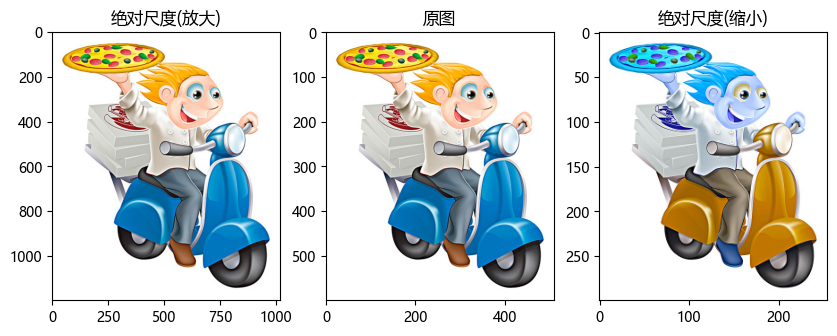

In [11]:
img1 = cv.imread("./images/xiaoren.png")
# 绝对尺寸
rows, cols = img1.shape[:2]
res = cv.resize(img1, (2 * cols, 2 * rows), interpolation=cv.INTER_CUBIC)

# 相对尺寸
res1 = cv.resize(img1, None, fx=0.5, fy=0.5)

# 使用opencv显示图像(不推荐)
# cv.imshow("orignal", img1)
# cv.imshow("enlarge", res)
# cv.imshow("shrink)", res1)
# cv.waitKey(0)

# 使用matplotlib显示图像
fig, axes = plt.subplots(1, 3, figsize=(10, 8), dpi=100)
axes[0].imshow(res[:, :, ::-1])
axes[0].set_title("绝对尺度(放大)")
axes[1].imshow(img1[:, :, ::-1])
axes[1].set_title("原图")
axes[2].imshow(res1)
axes[2].set_title("绝对尺度(缩小)")
plt.show()

In [12]:
# 加载图像
img = cv.imread("./images/xiaoren.png")

In [13]:
# 高度、宽度
old_height, old_width, _ = img.shape
print(f"旧图像的大小, 高度={old_height}, 宽度={old_width}")

new_height = int(old_height * 0.8)
new_width = 250
print(f"新图像的大小, 高度={new_height}, 宽度={new_width}")
dst = cv.resize(img, (new_width, new_height))  # 顺序相反：宽度、高度
print("新图像的形状：", dst.shape)

# 图像可视化
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

旧图像的大小, 高度=600, 宽度=510
新图像的大小, 高度=480, 宽度=250
新图像的形状： (480, 250, 3)


## 图像平移 cv.warpAffine(img, M, dsize)
- 图像平移将图像按照指定方向和距离，移动到相应的位置。
参数:
- img: 输入图像
- M:2*3移动矩阵
- 对于(x,y)处的像素点，要把它移动到(x+tx, y+ty)处时，M矩阵应如下设置:
$$M = \begin{bmatrix}1 & 0 & t_x \\0 & 1 & t_y\end{bmatrix}$$
- 注意:将M设置为np.float32类型的Numpy数组。
- dsize: 输出图像的大小
- 注意:输出图像的大小，它应该是(宽度，高度)的形式。请记住,width=列数，height=行数

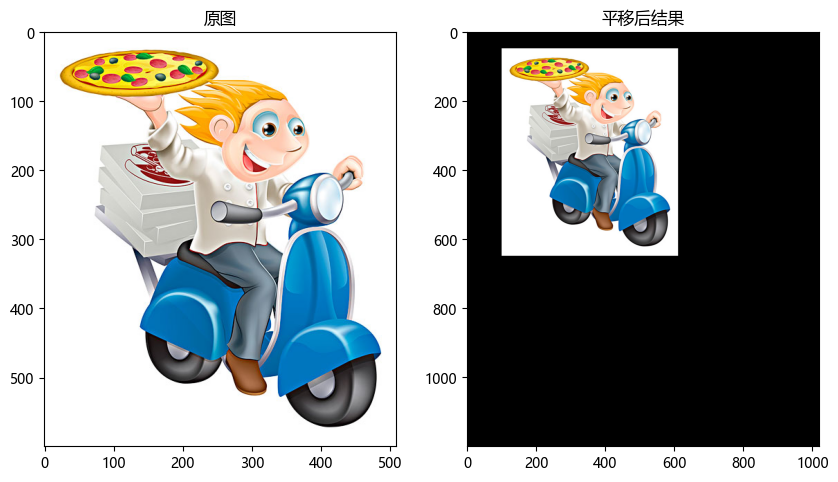

In [14]:
img1 = cv.imread("./images/xiaoren.png")

rows, cols = img1.shape[:2]
# 平移矩阵
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv.warpAffine(img1, M, (cols, rows))
dst = cv.warpAffine(img1, M, (2 * cols, 2 * rows))

fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=100)
axes[0].imshow(img1[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(dst[:, :, ::-1])
axes[1].set_title("平移后结果")
plt.show()

In [15]:
# 加载图像
img = cv.imread("./images/xiaoren.png")
# 重置大小
img = cv.resize(img, (500, 500))

# 可视化
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
"""仿射变换"""

# 构建仿射矩阵 M，定义具体的变换操作
# 20：向右平移 20 像素
# -10：向上平移 10 像素
M = np.float32([
    [1, 0, 20],
    [0, 1, -10]
])
# [[1, 0, tx], 
#  [0, 1, ty]]
# [[m11, m12, m13], 
#  [m21, m22, m23]]

# 内部会重新构造一个图像，按照坐标的映射关系进行像素的赋值
# warpAffine 计算规则：src(x, y) = dst(m11 * x + m12 * y + m13, m21 * x + m22 * y + m23)
# 原始图像中(0, 0)这个像素点的值，在新图像中就是：
# m11 * x + m12 * y + m13 = 20；m21 * x + m22 * y + m23 = -10
# x 和 y 是坐标点

# eg: 当前情况下，会将原来原始图像的坐标(0, 0)这个位置的像素值填充/映射到新图像的(1 * x + 0 * y + 20, 0 * x + 1 * y - 10) --> 新图像的坐标(20, -10)
# (img.shape[1], img.shape[0])：输出尺寸，保持原图的宽度和高度（shape[1] 是宽度，shape[0] 是高度）
# 如果变换后部分像素超出图像边界，默认用黑色填充
dst = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
# dst = cv.warpAffine(img, M, (img.shape[1] * 2, img.shape[0]))  # 宽度加大

# 可视化
cv.imshow('img', img)
cv.imshow('dst', dst)  # 平移后的图像
cv.waitKey(0)
cv.destroyAllWindows()

#### 图像旋转 
- 图像旋转是指图像按照某个位置转动一定角度的过程，旋转中图像仍保持这原始尺寸。图像旋转后图像的水平对称轴、垂直对称轴及中心坐标原点都可能会发生变换，因此需要对图像旋转中的坐标进行相应转换。那图像是怎么进行旋转的呢?

![图像旋转](picture/图像旋转.png)

- 假设图像逆时针旋转0，则根据坐标转换可得旋转转换为:
$$
\begin{cases}
x' = r \cos(\alpha - \theta) \\
y' = r \sin(\alpha - \theta)
\end{cases}
$$

- 其中:
$$
r = \sqrt{x^2 + y^2}, \quad \sin \alpha = \frac{y}{\sqrt{x^2 + y^2}}, \quad \cos \alpha = \frac{x}{\sqrt{x^2 + y^2}}
$$
- 带入上面的公式中，有:
$$
\begin{cases} 
x' = x \cos \theta + y \sin \theta \\ 
y' = -x \sin \theta + y \cos \theta 
\end{cases}
$$
- 也可以写成:
$$
[x' \quad y' \quad 1] = [x \quad y \quad 1]
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$
- 同时我们要修正原点的位置，因为原图像中的坐标原点在图像的左上角，经过旋转后图像的大小会有所变化，原点也需要修正。
- 假设在旋转的时候是以旋转中心为坐标原点的，旋转结束后还需要将坐标原点移到图像左上角，也就是还要进行一次变换。

![图像旋转2](picture/图像旋转2.png)
$$
[x'' \quad y'' \quad 1] = [x' \quad y' \quad 1]
\begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & 0 \\
\text{left} & \text{top} & 1
\end{bmatrix}
= [x \quad y \quad 1]
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & 0 \\
\text{left} & \text{top} & 1
\end{bmatrix}
$$
- 在OpenCV中图像旋转首先根据旋转角度和旋转中心获取旋转矩阵，然后根据旋转矩阵进行变换，即可实现任意角度和任意中心的旋转效果。

In [17]:
"""图像旋转"""
# 构建仿射矩阵 M
# m11、m22控制缩放，m21、m12控制旋转，最后 1 列控制平移
M = np.float32([
    [0.8, -0.15, 0],
    [0.15, 0.8, 0]
])
# [[m11, m12, m13], 
#  [m21, m22, m23]]

# warpAffine 计算规则：src(x, y) = dst(m11 * x + m12 * y + m13, m21 * x + m22 * y + m23)
# x 和 y 是坐标点
# warpAffine：是一种坐标系转换的公式
dst = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 可视化
cv.imshow('img', img)
cv.imshow('dst', dst)  # 旋转后的图像
cv.waitKey(0)
cv.destroyAllWindows()

#### cv2.getRotationMatrix2D(center, angle, scale)
- 参数:
- - center:旋转中心
- - oangle:旋转角度
- - scale:缩放比例
- 返回:
- - M:旋转矩阵
- - 调用cv.warpAffine完成图像的旋转

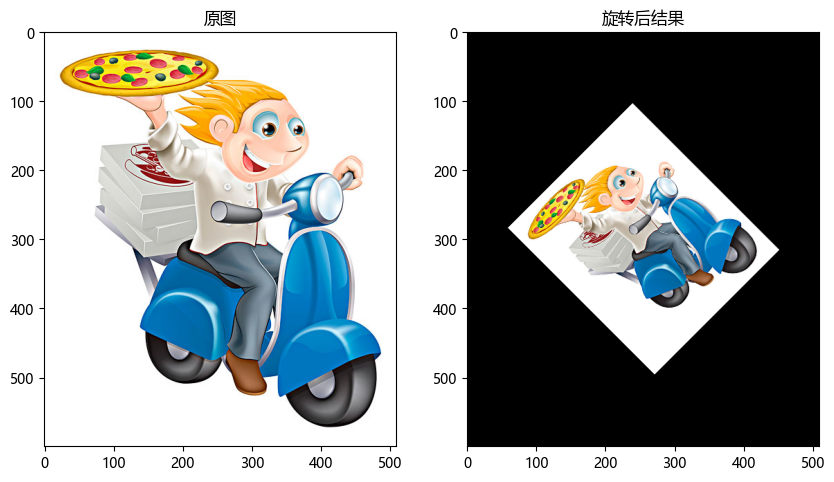

In [18]:
img1 = cv.imread("./images/xiaoren.png")
rows, cols = img1.shape[:2]

# 生成旋转矩阵
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 0.5)
# 进行旋转变换
dst = cv.warpAffine(img1, M, (cols, rows))

fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=100)
axes[0].imshow(img1[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(dst[:, :, ::-1])
axes[1].set_title("旋转后结果")
plt.show()

In [19]:
# 加载图像
img = cv.imread("./images/xiaoren.png")
# 高度、宽度
rows, cols, _ = img.shape

In [20]:
# NOTE: 参数随机（例如旋转中心、旋转角度、缩放比），M 矩阵就是随机的，就可以生成大量用于训练的图像

# 构建一个用于旋转的 M (旋转的中心点，旋转大小，缩放比)
# angle：负数表示顺时针旋转
M = cv.getRotationMatrix2D(center=(cols / 2, rows / 2), angle=-20, scale=1.0)
# M = cv.getRotationMatrix2D(center=(cols / 2, rows / 2), angle=-20, scale=0.5)
# M = cv.getRotationMatrix2D(center=(0, 0), angle=-20, scale=1)
# M = cv.getRotationMatrix2D(center=(cols / 2, rows / 2), angle=90, scale=1)
print("第1个用于旋转的M：\n", M, sep="")

# 构造旋转图像
# warpAffine 计算规则：src(x, y) = dst(m11 * x + m12 * y + m13, m21 * x + m22 * y + m23)
dst1 = cv.warpAffine(img, M, (cols, rows), borderValue=[0, 0, 0])

M = cv.getRotationMatrix2D(center=(0, 0), angle=20, scale=1)
print("\n第2个用于旋转的M：\n", M, sep="")
dst2 = cv.warpAffine(dst1, M, (cols, rows), borderValue=[128, 128, 128])  # 加灰色边框
print("\n旋转后图的形状：", dst.shape)

# 可视化
cv.imshow('img', img)
cv.imshow('dst1', dst1)  # 第 1 次旋转
cv.imshow('dst2', dst2)  # 第 2 次旋转
cv.waitKey(0)
cv.destroyAllWindows()

第1个用于旋转的M：
[[  0.93969262  -0.34202014 117.9844247 ]
 [  0.34202014   0.93969262 -69.12292278]]

第2个用于旋转的M：
[[ 0.93969262  0.34202014  0.        ]
 [-0.34202014  0.93969262  0.        ]]

旋转后图的形状： (600, 510, 3)


In [21]:
# 90、180、270 度旋转
# 顺时针旋转 90 度
dst = cv.rotate(img, rotateCode=cv.ROTATE_90_CLOCKWISE)
# 旋转 180 度
# dst = cv.rotate(img, rotateCode=cv.ROTATE_180)
# 逆时针旋转 90 度
# dst = cv.rotate(img, rotateCode=cv.ROTATE_90_COUNTERCLOCKWISE)
print("图像的形状：", dst.shape)

# 图像可视化
cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

图像的形状： (510, 600, 3)


## 图像翻转 cv.flip()

In [22]:
dst0 = cv.flip(img, 0)  # 垂直翻转
dst1 = cv.flip(img, 1)  # 水平翻转
print("图的形状：", dst.shape)

# 可视化
cv.imshow('img', img)
cv.imshow('dst0', dst0)  # 垂直翻转
cv.imshow('dst1', dst1)  # 水平翻转
cv.waitKey(0)
cv.destroyAllWindows()

图的形状： (510, 600, 3)


In [23]:
img = np.array(range(25)).reshape(5, 5)
print("======原图======")
print(img)
print("\n=====垂直翻转====")
print(cv.flip(img, 0))
print("\n=====垂直翻转====")
print(img[::-1, :])  # 步长 -1
print("\n====逆时针旋转===")
print(cv.rotate(img, rotateCode=cv.ROTATE_90_COUNTERCLOCKWISE))

======原图======
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

=====垂直翻转====
[[20 21 22 23 24]
 [15 16 17 18 19]
 [10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]

=====垂直翻转====
[[20 21 22 23 24]
 [15 16 17 18 19]
 [10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]

====逆时针旋转===
[[ 4  9 14 19 24]
 [ 3  8 13 18 23]
 [ 2  7 12 17 22]
 [ 1  6 11 16 21]
 [ 0  5 10 15 20]]


In [35]:
# 图像旋转（变成水平一点）

# 加载图像
img = cv.imread("./images/car3_plat.jpg")
h, w, _ = img.shape  # 高度、宽度

# 构建仿射矩阵 M
# angle：正数表示逆时针选择
M = cv.getRotationMatrix2D(center=(0, 0), angle=20, scale=1)
# 重构图像
# (w + 30, w // 2)：宽度、高度
dst = cv.warpAffine(img, M, (w + 30, w // 2), borderValue=[0, 0, 0])

# 可视化
cv.imshow('img', img)
cv.imshow('dst', dst)  # 旋转后的图像
cv.waitKey(0)
cv.destroyAllWindows()

# 保存图像
cv.imwrite('./images/car3_plat2.png', dst)

True

## 仿射变换
在仿射变换中，原图中是平行的元素在新的图像中也是平行的元素；可以任意的给定三个点来构建

#### 仿射变换
- 图像的仿射变换涉及到图像的形状位置角度的变化，是深度学习预处理中常到的功能,仿射变换主要是对图像的缩放，旋转，翻转和平移等操作的组合。
- 那什么是图像的仿射变换，如下图所示，图1中的点1,2和3与图二中三个点一一映射,仍然形成三角形,但形状已经大大改变，通过这样两组三点(感兴趣点)求出仿射变换，接下来我们就能把仿射变换应用到图像中所有的点中，就完成了图像的仿射变换。

![仿射变换](picture/仿射变换.png)

- 在OpenCV中，仿射变换的矩阵是一个2x3的矩阵，
$$
M = \begin{bmatrix} A & B \end{bmatrix} = \begin{bmatrix} a_{00} & a_{01} & b_0 \\ a_{10} & a_{11} & b_1 \end{bmatrix}
$$
- 其中左边的2x2子矩阵$A$是线性变换矩阵，右边的2x1子矩阵$B$是平移项:
$$
A = \begin{bmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{bmatrix}, \quad B = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}
$$
- 对于图像上的任一位置(x,y)，仿射变换执行的是如下的操作
$$
T_{\text{affine}} = A \begin{bmatrix} x \\ y \end{bmatrix} + B = M \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$
- 需要注意的是，对于图像而言，宽度方向是x，高度方向是y，坐标的顺序和图像像素对应下标一致。所以原点的位置不是左下角而是右上角，y的方向也不是向上，而是向下。
- 在仿射变换中，原图中所有的平行线在结果图像中同样平行。为了创建这个矩阵我们需要从原图像中找到三个点以及他们在输出图像中的位置。然后cv2.getAffineTransform 会创建一个2x3 的矩阵，最后这个矩阵会被传给函数 cv2.warpAffine。

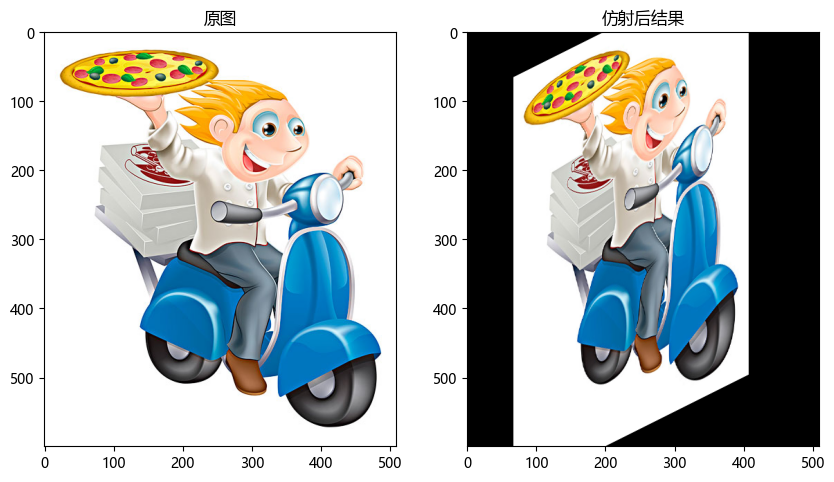

In [26]:
img = cv.imread('./images/xiaoren.png')

rows, cols = img.shape[:2]

# 创建变换矩阵
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[100, 100], [200, 50], [100, 250]])
M = cv.getAffineTransform(pts1, pts2)
# 完成仿射变换
dst = cv.warpAffine(img, M, (cols, rows))

fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=100)
axes[0].imshow(img[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(dst[:, :, ::-1])
axes[1].set_title("仿射后结果")
plt.show()

In [27]:
# 加载图像
img = cv.imread("./images/xiaoren.png")
rows, cols, _ = img.shape  # 高度、宽度

# 画 4 条直线
# pt1=(0, rows // 3)：线条的起点坐标，格式为 (x, y)
# pt2：终点坐标，格式同上
cv.line(img, pt1=(0, rows // 3), pt2=(cols, rows // 3), color=(255, 0, 0), thickness=2)  # 蓝横线
cv.line(img, pt1=(0, 2 * rows // 3), pt2=(cols, 2 * rows // 3), color=(0, 255, 0), thickness=2)  # 绿横线
cv.line(img, pt1=(cols // 3, 0), pt2=(cols // 3, rows), color=(0, 0, 255), thickness=2)  # 红竖线
cv.line(img, pt1=(2 * cols // 3, 0), pt2=(2 * cols // 3, rows), color=(0, 0, 0), thickness=2)  # 黑竖线

# 可视化
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

仿射变换矩阵 M：
[[ 1.05555556e+00  0.00000000e+00 -1.69444444e+02]
 [ 2.43614652e-16  1.25000000e+00 -2.00000000e+02]]


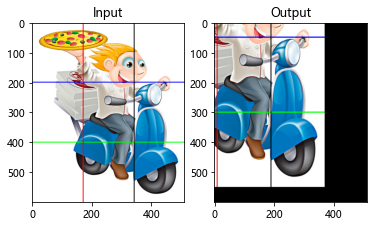

In [28]:
# 分布在原始图像中选择三个点，以及这三个点在新图像中的位置
pts1 = np.float32([[170, 200], [350, 200], [170, 400]])  # 原图 [宽度, 高度]
pts2 = np.float32([[10, 50], [200, 50], [10, 300]])  # 新图

# .getAffineTransform()：用于计算 仿射变换矩阵（Affine Transform Matrix） 的函数
# 它根据两组对应的点计算出一个 2×3 的变换矩阵 M
M = cv.getAffineTransform(pts1, pts2)
print("仿射变换矩阵 M：\n", M, sep="")

# 进行仿射变换
dst = cv.warpAffine(img, M, (cols, rows))

# 可视化
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # 原图
plt.title('Input')
plt.subplot(122)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))  # 新图
plt.title('Output')
plt.show()

旋转仿射矩阵M：
[[ 0.93969262  0.34202014  0.        ]
 [-0.34202014  0.93969262  0.        ]]

三点仿射矩阵M：
[[  1.30434783  -0.05671078 -19.56521739]
 [  0.           1.           0.        ]]


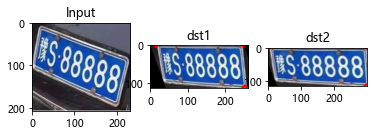

In [34]:
# 加载图像
img = cv.imread("./images/car3_plat.jpg")
h, w, _ = img.shape

# 构建仿射矩阵 M
# angle：正数表示逆时针选择
M = cv.getRotationMatrix2D(center=(0, 0), angle=20, scale=1)
print("旋转仿射矩阵M：\n", M, sep="")

# 进行转换
dst1 = cv.warpAffine(img, M, (w + 30, w // 2), borderValue=[0, 0, 0])
h, w, _ = dst1.shape

# 分布在原始图像中选择三个点以及这三个点在新图像中的位置
pts1 = np.float32([[15, 0], [245, 0], [250, 115]])
pts2 = np.float32([[0, 0], [300, 0], [300, 115]])
# 绘制原图中的三个点
cv.circle(dst1, center=(15, 0), radius=5, color=(0, 0, 255), thickness=5)
cv.circle(dst1, center=(245, 0), radius=5, color=(0, 0, 255), thickness=5)
cv.circle(dst1, center=(250, 115), radius=5, color=(0, 0, 255), thickness=5)

# 构建对应的 M
M = cv.getAffineTransform(pts1, pts2)
print("\n三点仿射矩阵M：\n", M, sep="")
# 进行转换
dst2 = cv.warpAffine(dst1, M, (300, h))

# 可视化
plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # 原图
plt.title('Input')
plt.subplot(132)
plt.imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))  # 旋转
plt.title('dst1')
plt.subplot(133)
plt.imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))  # 三点仿射
plt.title('dst2')
plt.show()

## 透视转换
实际上就是根据给定的四个点来进行转换操作，在转换过程中图像的形状不会发现变化，也就是原来是直线的，转换后还是直线，要求这四个点中任意三个点均不在同一线上<br/>

In [29]:
# 加载图像
img = cv.imread("./images/xiaoren.png")
rows, cols, _ = img.shape  # 高度、宽度

# 画两条线
cv.line(img, pt1=(0, rows // 2), pt2=(cols, rows // 2), color=(255, 0, 0), thickness=5)  # 横线
cv.line(img, pt1=(cols // 2, 0), pt2=(cols // 2, rows), color=(255, 0, 0), thickness=5)  # 竖线

# 可视化
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

透视转换矩阵M：
 [[ 1.05587376e+00  9.18151097e-02 -6.50969128e+01]
 [ 4.69010049e-02  1.12562412e+00 -7.57920240e+01]
 [ 1.83251448e-04  5.13337001e-04  1.00000000e+00]]


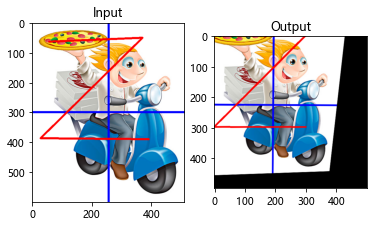

In [30]:
# 定义四个点
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])  # 原图像：随机
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
# pts2 = np.float32([[0 + 33, 0 - 115], [300 - 8, 0 - 7], [0 + 6, 300 + 8], [300 - 3, 300 + 7]])  # 新图像：随机 + 偏移项

# 转换为整数（多边形的顶点坐标要求是整数）
pts1_int = np.int32(pts1)
# 画多边形
cv.polylines(img, [pts1_int], isClosed=False, color=(0, 0, 255), thickness=5)

# M 是一个 3*3 的矩阵
# [[m11, m12, m13], 
#  [m21, m22, m23],
#  [m31, m32, m33]]
M = cv.getPerspectiveTransform(pts1, pts2)
print("透视转换矩阵M：\n", M)

# 透视转换
# 计算规则：src(x, y) = dst(m11x + m12y + m13 / (m31x + m32y + m33), m21x + m22y + m23 / (m31x + m32y + m33))
dst = cv.warpPerspective(img, M, (500, 500))  # 放大一点

# 可视化画图
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # 原图
plt.title('Input')
plt.subplot(122)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))  # 新图
plt.title('Output')
plt.show()

仿射矩阵M：
[[  1.30434783  -0.05671078 -19.56521739]
 [  0.           1.           0.        ]]

透视矩阵M：
[[ 1.53163461e+00 -2.91010576e-01 -2.29745191e+01]
 [ 8.52651283e-17  1.08822639e+00 -7.79277133e-17]
 [ 7.11237553e-04 -7.78982594e-04  1.00000000e+00]]


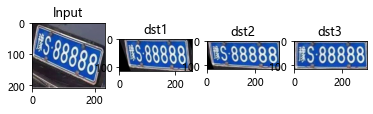

In [31]:
# NOTE：
# 1.在深度学习中，OpenCV 只负责数据增强，只负责生成大量随机的图片，无需考虑如何选择点；
#  只要 M 矩阵随机（例如新点随机偏移），只要能映射成新的图像就可以了
# 2.在 OpenCV 本身，如何选择点由业务给定（很少做）；
#  例如车牌，高宽比：1 比 3，新图像从开始点确定其他的点

# 加载图像
img = cv.imread("./images/car3_plat.jpg")
h, w, _ = img.shape

# 普通旋转逻辑：需要给定旋转中心 + 角度 + 缩放大小
# angle：正数表示逆时针选择
M = cv.getRotationMatrix2D(center=(0, 0), angle=20, scale=1)
dst1 = cv.warpAffine(img, M, (w + 30, w // 2), borderValue=[0, 0, 0])
h, w, _ = dst1.shape

# 仿射变换：需要给定三个点在原始图像和新图像之间的坐标映射关系
pts1 = np.float32([[15, 0], [245, 0], [250, 115]])
pts2 = np.float32([[0, 0], [300, 0], [300, 115]])
# 构建对应的 M
M = cv.getAffineTransform(pts1, pts2)
print("仿射矩阵M：\n", M, sep="")
# 进行转换
dst2 = cv.warpAffine(dst1, M, (300, h))

# 透视变换：基于四个点在原始图像和新图像中的映射关系进行转换
pts1 = np.float32([[15, 0], [245, 0], [250, 115], [34, 100]])
pts2 = np.float32([[0, 0], [300, 0], [300, 115], [0, 115]])  # 业务给定
# 构建对应的 M
M = cv.getPerspectiveTransform(pts1, pts2)
print("\n透视矩阵M：\n", M, sep="")
dst3 = cv.warpPerspective(dst1, M, (300, h))

# 可视化画图
plt.subplot(141)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(142)
plt.imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))  # 旋转图
plt.title('dst1')
plt.subplot(143)
plt.imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))  # 仿射图
plt.title('dst2')
plt.subplot(144)
plt.imshow(cv.cvtColor(dst3, cv.COLOR_BGR2RGB))  # 透视图
plt.title('dst3')
plt.show()

#### 透射变换
- 透射变换是视角变化的结果，是指利用透视中心、像点、目标点三点共线的条件，按透视旋转定律使承影面(透视面)绕迹线(透视轴)旋转某一角度，破坏原有的投影光线束，仍能保持承影面上投影几何图形不变的变换。

![透射变换](picture/透射变换.png)

- 它的本质将图像投影到一个新的视平面，其通用变换公式为:
$$
\begin{bmatrix} x' & y' & z' \end{bmatrix} = \begin{bmatrix} u & v & w \end{bmatrix} \begin{bmatrix} a_{00} & a_{01} & a_{02} \\ a_{10} & a_{11} & a_{12} \\ a_{20} & a_{21} & a_{22} \end{bmatrix}
$$
- 其中，(u,w)是原始的图像像素坐标，w取值为1，(x=x'/z',y=y'/z')是透射变换后的结果。后面的矩阵称为透视变换矩阵，一般情况下，我们将其分为三部分:
$$
T = \begin{bmatrix} a_{00} & a_{01} & a_{02} \\ a_{10} & a_{11} & a_{12} \\ a_{20} & a_{21} & a_{22} \end{bmatrix} = \begin{bmatrix} T1 & T2 \\ T3 & a_{22} \end{bmatrix}
$$
- 其中:T1表示对图像进行线性变换，T2对图像进行平移，T3表示对图像进行投射变换，a22一般设为1.
- 在opencv中，我们要找到四个点，其中任意三个不共线，然后获取变换矩阵T，再进行透射变换。通过函数cv.getPerspectiveTransform找到变换矩阵，将cv.warpPerspective应用于此3x3变换矩阵。

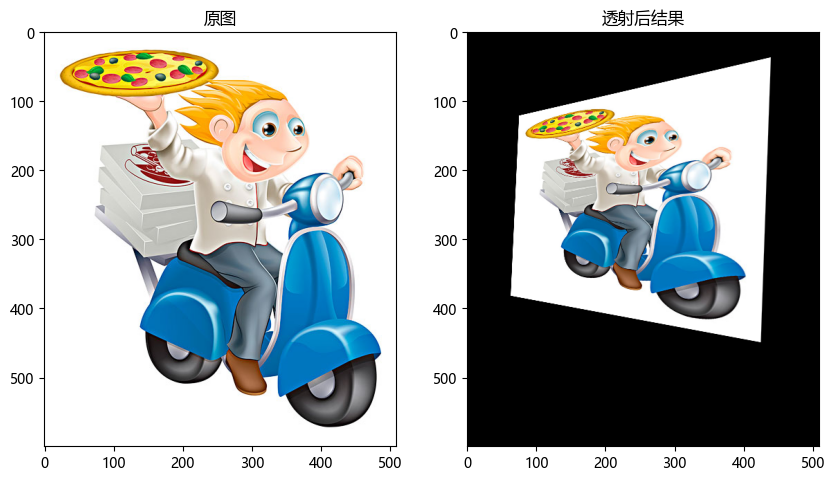

In [32]:
img = cv.imread('./images/xiaoren.png')

rows, cols = img.shape[:2]

# 创建变换矩阵
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[100, 145], [300, 100], [80, 290], [310, 300]])

T = cv.getPerspectiveTransform(pts1, pts2)
# 进行变换
dst = cv.warpPerspective(img, T, (cols, rows))

fig, axes = plt.subplots(1, 2, figsize=(10, 8), dpi=100)
axes[0].imshow(img[:, :, ::-1])
axes[0].set_title("原图")
axes[1].imshow(dst[:, :, ::-1])
axes[1].set_title("透射后结果")
plt.show()

#### 图像金字塔
- 图像金字塔是图像多尺度表达的一种，最主要用于图像的分割，是一种以多分辨率来解释图像的有效但概念简单的结构。
- 图像金字塔用于机器视觉和图像压缩，一幅图像的金字塔是一系列以金字塔形状排列的分辨率逐步降低，且来源于同一张原始图的图像集合。其通过梯次向下采样获得，直到达到某个终止条件才停止采样。
- 金字塔的底部是待处理图像的高分辨率表示，而顶部是低分辨率的近似，层级越高，图像越小，分辨率越低。

![金字塔](picture/金字塔.png)

#### cv.pyrUp( img) 对图像进行上采样
#### cv.pyrDown(img) 对图像进行下采样

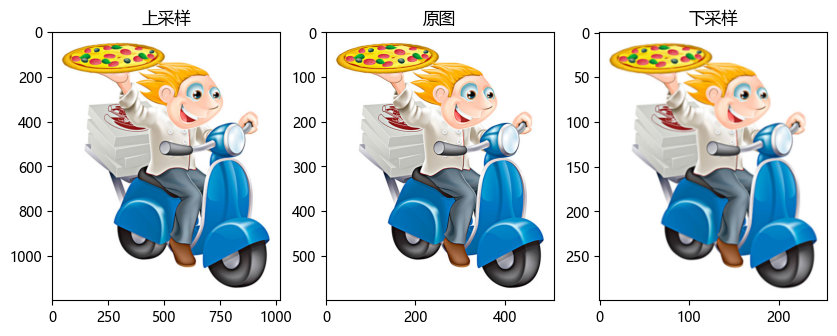

In [33]:
img = cv.imread('./images/xiaoren.png')

up_img = cv.pyrUp(img)
img_1 = cv.pyrDown(img)

# cv.imshow('enlarge', up_img)
# cv.imshow('original', img)
# cv.imshow('shrink', img_1)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, axes = plt.subplots(1, 3, figsize=(10, 8), dpi=100)
axes[0].imshow(up_img[:, :, ::-1])
axes[0].set_title("上采样")
axes[1].imshow(img[:, :, ::-1])
axes[1].set_title("原图")
axes[2].imshow(img_1[:, :, ::-1])
axes[2].set_title("下采样")
plt.show()